In [52]:
import pandas as pd
import string                                           #Importing Required Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Loading Dataset
df = pd.read_csv('spam.csv', encoding='latin-1')  # Use actual path
df = df[['v1', 'v2']]  # Keep only relevant columns

# Renaming for clarity
df.columns = ['label', 'message']


Unique labels: [0 1]


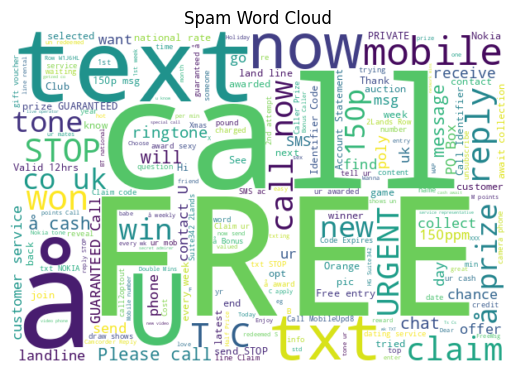

In [89]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Joining all spam messages
spam_words = ' '.join(df[df['label'] == 1]['message'].dropna())

if len(spam_words.strip()) == 0:
    print("No spam messages found to generate word cloud.")
else:
    spam_wc = WordCloud(width=600, height=400, background_color='white').generate(spam_words)

    plt.imshow(spam_wc, interpolation='bilinear')
    plt.axis('off')                                    #Plotting Spam Word Cloud
    plt.title("Spam Word Cloud")
    plt.show()



In [90]:
spam_words = ['congratulations', 'free', 'ticket', 'call', 'won', 'now'] #Searching sample spam words in our vocabulary
vocab = tfidf.get_feature_names_out()

for word in spam_words:
    print(f"'{word}' in vocab? -->", word in vocab)


'congratulations' in vocab? --> True
'free' in vocab? --> True
'ticket' in vocab? --> True
'call' in vocab? --> False
'won' in vocab? --> True
'now' in vocab? --> False


In [91]:


def clean_text(text):                 #Cleaning Input Text
    text = text.lower().strip()
    return text.translate(str.maketrans('', '', string.punctuation))

df['message_clean'] = df['message'].apply(clean_text)
df['label'] = df['label'].astype(int)


X_train, X_test, y_train, y_test = train_test_split(
    df['message_clean'], df['label'],                          #Splitting Dataset into Training and Testing
    test_size=0.2, random_state=42, stratify=df['label']
)

                                                               #Vectorizing Words with Bigrams and removing stop words
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

                                                              #Training and Naive Bayes Model
model = MultinomialNB(alpha=1.0)
model.fit(X_train_vec, y_train)

y_pred = model.predict(X_test_vec)
print("Classification Report on Test Data:\n")                #Classification Report Of our Model
print(classification_report(y_test, y_pred))


def predict_user_input():
    print("\nEnter SMS messages to classify as spam or not.")   #User Input Prediction
    print("Type 'exit' to quit.\n")

    while True:
        user_msg = input("Enter SMS: ")
        if user_msg.lower() == 'exit':
            print("Exiting...")
            break

        msg_clean = clean_text(user_msg)
        msg_vec = vectorizer.transform([msg_clean])
        pred = model.predict(msg_vec)

        if pred[0] == 1:
            print("This message is SPAM.\n")
        else:
            print("This message is NOT spam.\n")


predict_user_input()


Classification Report on Test Data:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.99      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Enter SMS messages to classify as spam or not.
Type 'exit' to quit.

Enter SMS: # --- 4. Vectorize with bigrams and stop words removal ---
This message is NOT spam.

Enter SMS: exit
Exiting...
